In [35]:
import torch

Create a random tensor with shape (8, 8).

In [36]:
random_tensor = torch.rand(8, 8)

Perform a matrix multiplication on the tensor from point 1 with another random tensor with shape (1,8) (hint: you may have to transpose the second tensor).

In [37]:
random_tensor2 = torch.rand(1,8)
matmultedTensors = random_tensor @ random_tensor2.T
print(matmultedTensors)


tensor([[1.9639],
        [2.0206],
        [1.2446],
        [1.4794],
        [2.4316],
        [1.4787],
        [2.0181],
        [2.2161]])


Set the random seed to 0 and do exercises points 1 & 2 over again.

In [38]:
torch.random.manual_seed(0)
random_tensor = torch.rand(8, 8)
random_tensor2 = torch.rand(1,8)
matmultedTensors = random_tensor @ random_tensor2.T

print(matmultedTensors)
matmultedTensors.shape

tensor([[2.0579],
        [1.4392],
        [2.9189],
        [1.9295],
        [1.7499],
        [1.5325],
        [2.7487],
        [2.2421]])


torch.Size([8, 1])

Create two random tensors of shape (2, 3).

In [39]:
random_tensor = torch.rand(2, 3)
random_tensor2 = torch.rand(2, 3)

Perform a matrix multiplication on the tensors you created in point 4 (again, you may have to adjust the shapes of one of the tensors).

In [40]:
matmultedTensors = random_tensor @ random_tensor2.T
print(matmultedTensors)

matmultedTensors.shape

tensor([[0.5833, 1.4636],
        [0.6283, 1.4165]])


torch.Size([2, 2])

Find the maximum and minimum index values of the output of point 5. What do you notice?


In [41]:
print(matmultedTensors.argmax())
print(matmultedTensors.argmin())

#Flattens out the tensor to something  like an array and picks the index for that

matmultedTensors[:,0]

tensor(1)
tensor(0)


tensor([0.5833, 0.6283])

Make a random tensor with shape (1, 1, 1, 12) and then create a new tensor with all the 1 dimensions removed to be left with a tensor of shape (12). Print out the first tensor and its shape, as well as the second tensor and its shape.

In [42]:
random_tensor = torch.rand(1, 1, 1 , 12)
print(random_tensor)
print(random_tensor.shape)

random_tensor_ones_removed = random_tensor.squeeze()
print(random_tensor_ones_removed)
print(random_tensor_ones_removed.shape)


tensor([[[[0.5936, 0.4158, 0.4177, 0.2711, 0.6923, 0.2038, 0.6833, 0.7529,
           0.8579, 0.6870, 0.0051, 0.1757]]]])
torch.Size([1, 1, 1, 12])
tensor([0.5936, 0.4158, 0.4177, 0.2711, 0.6923, 0.2038, 0.6833, 0.7529, 0.8579,
        0.6870, 0.0051, 0.1757])
torch.Size([12])


Assignment 1.2: Building a multi-class PyTorch model

Create a multi-class dataset using the spirals data creation function from CS231n. See attached Python script “CS231n-spiral-generator.py” CS231n-spiral-generator.py. Create data with 3 classes at least 200 points per class with 2 dimensions. Split data on training and testing set so that you use 20 % of data for testing.

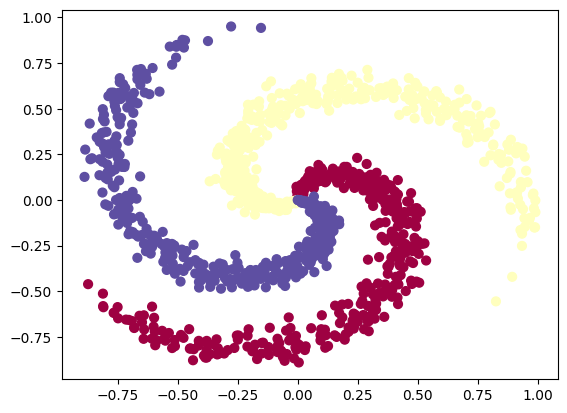

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

N = 400 #Number of points per class
C = 3
D = 2
X = np.zeros((N*C, D))
y = np.zeros(N*C, dtype='uint8')
for i in range(C):
    ix = range(N*i, N*(i+1))
    r = np.linspace(0.0, 1, N)
    t = np.linspace(i*4, (i+1)*4, N) + np.random.randn(N)*0.2
    X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    y[ix] = i

plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()


X = torch.from_numpy(X).type(torch.float)

y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#len(X_train), len(X_test), len(y_train), len(y_test)


Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).

In [44]:
from torch import nn
class SpiralModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=2, out_features=8),
            nn.ReLU(), 
            nn.Linear(in_features=8, out_features=8),
            nn.ReLU(), 
            nn.Linear(in_features=8, out_features=3) 
        )
    def forward(self, x):
        return self.linear_layer_stack(x)

model_Spiral = SpiralModel()
model_Spiral.parameters


<bound method Module.parameters of SpiralModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=3, bias=True)
  )
)>

Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD; you may have to experiment with different learning rate values to get it working).

In [45]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_Spiral.parameters(), lr=0.01)


Make a training and testing loop for the multi-class data and train a model to reach over 95% testing accuracy.

In [46]:
import torchmetrics

def accuracy_fn(y_true, y_pred, num_classes=3):
    accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=num_classes)
    acc = accuracy(y_pred, y_true)  
    return acc

In [47]:
epochs = 500
y_train = y_train.long()
y_test = y_test.long()

for epoch in range(epochs):
    model_Spiral.train()

    y_logits = model_Spiral(X_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    loss = loss_fn(y_logits, y_train)

    acc = accuracy_fn(y_train, y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    with torch.inference_mode():
        test_logits = model_Spiral(X_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_preds)

        if epoch % 10 == 0:
            print(f"Epoch {epoch} loss {loss:.5f} acc {acc:.2f} testLoss {test_loss:.5f} testAcc {test_acc:.2f}")
    
   



Epoch 0 loss 1.13524 acc 0.33 testLoss 1.11045 testAcc 0.36
Epoch 10 loss 1.05575 acc 0.48 testLoss 1.04124 testAcc 0.52
Epoch 20 loss 0.97828 acc 0.52 testLoss 0.95852 testAcc 0.57
Epoch 30 loss 0.90371 acc 0.45 testLoss 0.88536 testAcc 0.50
Epoch 40 loss 0.86023 acc 0.48 testLoss 0.84533 testAcc 0.52
Epoch 50 loss 0.82846 acc 0.49 testLoss 0.81954 testAcc 0.53
Epoch 60 loss 0.77773 acc 0.53 testLoss 0.77658 testAcc 0.57
Epoch 70 loss 0.70450 acc 0.66 testLoss 0.71610 testAcc 0.66
Epoch 80 loss 0.63730 acc 0.65 testLoss 0.66206 testAcc 0.64
Epoch 90 loss 0.59561 acc 0.66 testLoss 0.62906 testAcc 0.65
Epoch 100 loss 0.56319 acc 0.69 testLoss 0.59271 testAcc 0.68
Epoch 110 loss 0.53305 acc 0.72 testLoss 0.56204 testAcc 0.70
Epoch 120 loss 0.50822 acc 0.74 testLoss 0.53852 testAcc 0.70
Epoch 130 loss 0.48970 acc 0.74 testLoss 0.52175 testAcc 0.70
Epoch 140 loss 0.47161 acc 0.74 testLoss 0.50327 testAcc 0.72
Epoch 150 loss 0.44722 acc 0.77 testLoss 0.48359 testAcc 0.73
Epoch 160 loss 0.41

Experiment with different learning rates. What do you notice?
SKRIV NÅGOT

In [48]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)



helper_functions.py already exists, skipping download


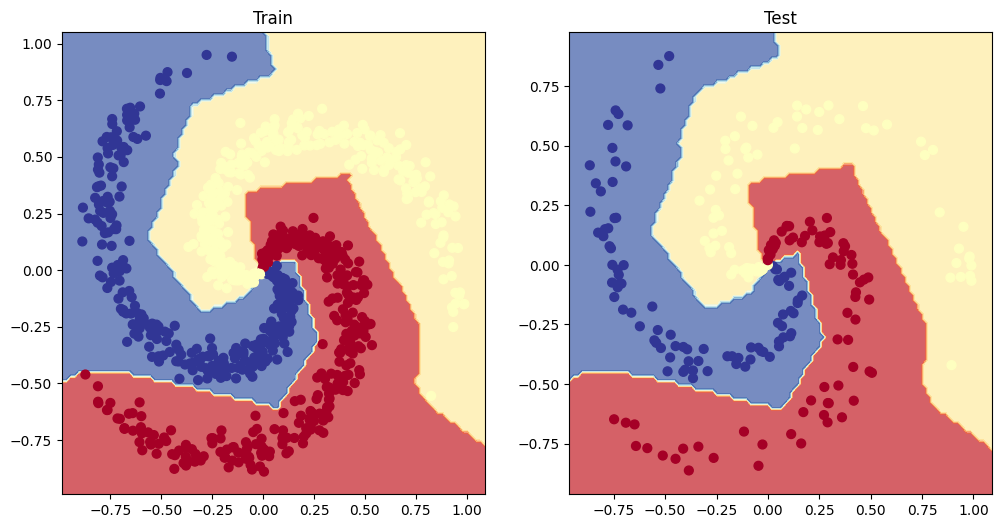

In [49]:
from helper_functions import plot_decision_boundary

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_Spiral, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_Spiral, X_test, y_test)

Assignment 1.3: Building your own models for digit classification using the MNIST dataset

Implement 3 to 4 different models for digit classification of MNIST data by changing:
Network architecture: number of layers and activation functions
Hyperparameters such as hidden size, number of training epochs, batch size, learning rate, and optimizer

In [50]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor



In [51]:
# Setup training data
train_data = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)
# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)



In [52]:
#create a dataloader
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

next(iter(train_dataloader))[0].shape

print(len(train_data))
print(len(test_data))



60000
10000


In [53]:
from torch import nn

class model_MNIST0(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=784, out_features=10),
            nn.Linear(in_features=10, out_features=10),
            nn.Linear(in_features=10, out_features=10)
        )
    def forward(self, x):
        return self.linear_stack(x)
    


In [54]:
import torchmetrics

def accuracy_fn(y_true, y_pred, num_classes=10):
    accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=num_classes)
    acc = accuracy(y_pred, y_true)  
    return acc

In [55]:
def learn(model, loss_fn, optimizer, train_loader, test_loader, epochs=100):
    torch.manual_seed(0)

    # Lists to store values for each epoch
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    for epoch in range(epochs):
        model.train()

        train_loss = 0
        test_loss = 0
        train_acc = 0
        test_acc = 0

        # Training Loop
        for batch_x, batch_y in train_loader:
            y_logits = model(batch_x)  # Don't apply softmax here
            loss = loss_fn(y_logits, batch_y)
            train_loss += loss.item()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            y_pred = torch.softmax(y_logits, dim=1)
            acc = accuracy_fn(y_true=batch_y, y_pred=y_pred.argmax(dim=1))
            train_acc += acc

        train_loss /= len(train_loader)
        train_acc /= len(train_loader)
        model.eval()
        total_test_loss = 0
        total_test_acc = 0
        total_samples = 0

        with torch.inference_mode():
            for test_batch_x, test_batch_y in test_loader:
                test_logits = model(test_batch_x)
                loss = loss_fn(test_logits, test_batch_y)
                
                # Accumulate loss weighted by batch size
                total_test_loss += loss.item() * test_batch_x.size(0)  
                total_samples += test_batch_x.size(0)

                test_preds = torch.softmax(test_logits, dim=1)
                total_test_acc += accuracy_fn(test_batch_y, test_preds.argmax(dim=1)) * test_batch_x.size(0)

    # Average the loss and accuracy
        test_loss = total_test_loss / total_samples
        test_acc = total_test_acc / total_samples

        print(f"Epoch {epoch+1}: Train Loss: {train_loss:.5f}, Train Acc: {train_acc:.2f}, Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}")

        # Store results
        train_losses.append(train_loss)
        train_accuracies.append(train_acc)
        test_losses.append(test_loss)
        test_accuracies.append(test_acc)

    return train_losses, train_accuracies, test_losses, test_accuracies


In [56]:
model0 = model_MNIST0()
loss_fn0 = nn.CrossEntropyLoss()
optimizer0 = torch.optim.Adam(model0.parameters(), lr=0.01)

In [57]:
num_epochs= 3
model0_train_loss, model0_train_acc, model0_val_loss, model0_val_acc = learn(model0,loss_fn0, optimizer0, train_dataloader,test_dataloader, num_epochs)

Epoch 3: Train Loss: 0.34253, Train Acc: 0.90, Test Loss: 0.31853, Test Acc: 0.91


Model 2
adding non linearity

In [58]:

class model_MNIST1(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=784, out_features=120),
            nn.LeakyReLU(),
            nn.Linear(in_features=120, out_features=120),
            nn.LeakyReLU(),
            nn.Linear(in_features=120, out_features=10)
        )
    def forward(self, x):
        return self.linear_stack(x)
    

In [59]:
#Keeping loss and optimizer the same to see how changes in the layers affect the model
model1 = model_MNIST1()
loss_fn1 = nn.CrossEntropyLoss()
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.01)


In [60]:
#Train model 
model1_train_loss, model1_train_acc, model1_val_loss, model1_val_acc = learn(model1,loss_fn1, optimizer1, train_dataloader,test_dataloader, num_epochs)

Epoch 3: Train Loss: 0.16053, Train Acc: 0.96, Test Loss: 0.15686, Test Acc: 0.95


Nonlinear model performs much worse than linear model (Skriv om detta i inlämning)

Model 3 Adding convolutional layers

In [61]:

class model_MNIST2(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(in_channels=1, 
                      out_channels=10, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.Conv2d(in_channels=10, 
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.MaxPool2d(kernel_size=2,
                         stride=2), # default stride value is same as kernel_size
            nn.Conv2d(10, 10, 3, padding=1),
            nn.Conv2d(10, 10, 3, padding=1),
            nn.MaxPool2d(2),
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=10*7*7, 
                      out_features=10)
        )
    def forward(self, x):
        return self.conv_stack(x)
    

In [62]:
#Keeping loss and optimizer the same to see how changes in the layers affect the model
model2 = model_MNIST2()
loss_fn2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.01)

model2_train_loss, model2_train_acc, model2_val_loss, model2_val_acc = learn(model2,loss_fn2, optimizer2, train_dataloader,test_dataloader, num_epochs)


Epoch 3: Train Loss: 0.13703, Train Acc: 0.96, Test Loss: 0.08543, Test Acc: 0.98


In [63]:

class model_MNIST3(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_stack = nn.Sequential(
            nn.Conv2d(in_channels=1, 
                      out_channels=10, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.LeakyReLU(),
            nn.Conv2d(in_channels=10, 
                      out_channels=10,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2), # default stride value is same as kernel_size
            nn.Conv2d(10, 10, 3, padding=1),
            nn.LeakyReLU(),
            nn.Conv2d(10, 10, 3, padding=1),
            nn.LeakyReLU(),
            nn.MaxPool2d(2),
            nn.Flatten(),
            nn.Linear(in_features=10*7*7, 
                      out_features=10)
        )
    def forward(self, x):
        return self.conv_stack(x)
    

In [64]:
#Keeping loss and optimizer the same to see how changes in the layers affect the model
model3 = model_MNIST3()
loss_fn3 = nn.CrossEntropyLoss()
optimizer3 = torch.optim.Adam(model3.parameters(), lr=0.01)

model3_train_loss, model3_train_acc, model3_val_loss, model3_val_acc = learn(model3,loss_fn3, optimizer3, train_dataloader,test_dataloader, num_epochs)


Epoch 3: Train Loss: 0.07127, Train Acc: 0.98, Test Loss: 0.06543, Test Acc: 0.98


ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

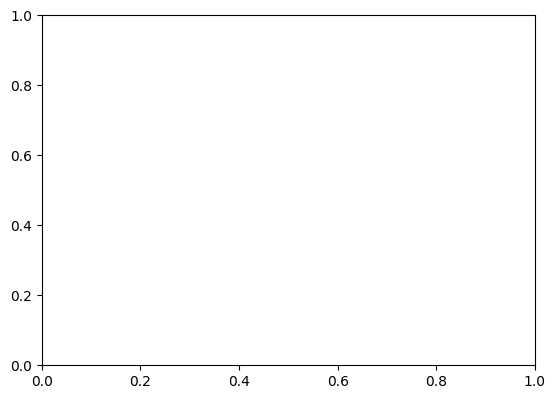

In [65]:
import matplotlib.pyplot as plt

# Example lists for storing accuracy and loss for each model
epochs = range(1, num_epochs + 1)  # The number of epochs

# Define a color map for each model
colors = {
    'model0': 'blue',
    'model1': 'orange',
    'model2': 'green',
    'model3': 'red'
}

# Example plotting function to compare models
def plot_model_comparisons():
    plt.figure(figsize=(14, 10))

    # Plot Training Loss for all models
    plt.subplot(2, 2, 1)
    plt.plot(epochs, model0_train_loss, label='Model 0 Train Loss', color=colors['model0'])
    plt.plot(epochs, model1_train_loss, label='Model 1 Train Loss', color=colors['model1'])
    plt.plot(epochs, model2_train_loss, label='Model 2 Train Loss', color=colors['model2'])
    plt.plot(epochs, model3_train_loss, label='Model 3 Train Loss', color=colors['model3'])
    plt.title('Training Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training Accuracy for all models
    plt.subplot(2, 2, 2)
    plt.plot(epochs, model0_train_acc, label='Model 0 Train Accuracy', color=colors['model0'])
    plt.plot(epochs, model1_train_acc, label='Model 1 Train Accuracy', color=colors['model1'])
    plt.plot(epochs, model2_train_acc, label='Model 2 Train Accuracy', color=colors['model2'])
    plt.plot(epochs, model3_train_acc, label='Model 3 Train Accuracy', color=colors['model3'])
    plt.title('Training Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Validation Loss for all models
    plt.subplot(2, 2, 3)
    plt.plot(epochs, model0_val_loss, label='Model 0 Val Loss', color=colors['model0'])
    plt.plot(epochs, model1_val_loss, label='Model 1 Val Loss', color=colors['model1'])
    plt.plot(epochs, model2_val_loss, label='Model 2 Val Loss', color=colors['model2'])
    plt.plot(epochs, model3_val_loss, label='Model 3 Val Loss', color=colors['model3'])
    plt.title('Validation Loss Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Validation Accuracy for all models
    plt.subplot(2, 2, 4)
    plt.plot(epochs, model0_val_acc, label='Model 0 Val Accuracy', color=colors['model0'])
    plt.plot(epochs, model1_val_acc, label='Model 1 Val Accuracy', color=colors['model1'])
    plt.plot(epochs, model2_val_acc, label='Model 2 Val Accuracy', color=colors['model2'])
    plt.plot(epochs, model3_val_acc, label='Model 3 Val Accuracy', color=colors['model3'])
    plt.title('Validation Accuracy Comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

# Call the function to plot
plot_model_comparisons()

    


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming each variable is an array where the last element is the value for the final epoch
# Final values from the arrays (extracting the last element from each)
train_losses = [model0_train_loss[-1], model1_train_loss[-1], model2_train_loss[-1], model3_train_loss[-1]]
val_losses = [model0_val_loss[-1], model1_val_loss[-1], model2_val_loss[-1], model3_val_loss[-1]]
train_accuracies = [model0_train_acc[-1], model1_train_acc[-1], model2_train_acc[-1], model3_train_acc[-1]]
val_accuracies = [model0_val_acc[-1], model1_val_acc[-1], model2_val_acc[-1], model3_val_acc[-1]]

# Model names for the x-axis labels
model_names = ['Model 0', 'Model 1', 'Model 2', 'Model 3']

# Set positions for the bars
x = np.arange(len(model_names))

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart for final losses (train and validation)
ax[0].bar(x - 0.2, train_losses, 0.4, label='Train Loss')
ax[0].bar(x + 0.2, val_losses, 0.4, label='Validation Loss')
ax[0].set_xlabel('Model')
ax[0].set_ylabel('Loss')
ax[0].set_title('Final Loss Comparison')
ax[0].set_xticks(x)
ax[0].set_xticklabels(model_names)
ax[0].legend()

# Bar chart for final accuracies (train and validation)
ax[1].bar(x - 0.2, train_accuracies, 0.4, label='Train Accuracy')
ax[1].bar(x + 0.2, val_accuracies, 0.4, label='Validation Accuracy')
ax[1].set_xlabel('Model')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Final Accuracy Comparison')
ax[1].set_xticks(x)
ax[1].set_xticklabels(model_names)
ax[1].legend()

# Display the plots
plt.tight_layout()
plt.show()
